<a href="https://colab.research.google.com/github/madan-genai/LangGraph/blob/main/LANGGRAPH_SEQUENTIAL_WORKFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langgraph

In [15]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.3 MB/s eta 0:00:00


In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [11]:
#define State
class BMIState(TypedDict):
  weight_kg: float
  height_m: float
  bmi: float
  category: str

In [6]:
def Calculate_bmi(state: BMIState) -> BMIState:
  weight = state["weight_kg"]
  height = state["height_m"]
  bmi = weight / (height **2)

  state["bmi"] = round(bmi, 2)
  return state

In [12]:
def label_bmi(state: BMIState) -> BMIState:
  bmi = state["bmi"]
  if bmi < 18.5:
    state["category"] = "underweight"
  elif 18.5 <= bmi < 25:
    state["category"] = "Normal"
  elif 25 <= bmi < 30:
    state["category"] = "Overweight"
  else:
    state["category"] = "Obese"
  return state


In [13]:
#define your graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node("Calculate_bmi", Calculate_bmi)
graph.add_node("label_bmi",label_bmi)

#add edges to your graph
graph.add_edge(START, "Calculate_bmi")
graph.add_edge("Calculate_bmi","label_bmi")
graph.add_edge("label_bmi",END)


# compile your graph
workflow = graph.compile()
# execute the graph
workflow.invoke({"weight_kg":50, "height_m":1.6})

{'weight_kg': 50, 'height_m': 1.6, 'bmi': 19.53, 'category': 'Normal'}

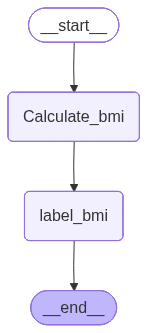

In [14]:
workflow

In [25]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict

In [17]:
import os
os.environ["GEMINI_API_KEY"]="AIzaSyBxHjguW3MPr-IY"

In [31]:
# Load Gemini model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",  # or gemini-1.5-pro
    temperature=0.7
)

In [23]:
# create State
class LLMState(TypedDict):
  question: str
  answer: str

In [24]:
def llm_qa(state: LLMState) -> LLMState:
  # extract the question from state
   question = state["question"]

   # form a prompt
   prompt = f"Answer the following question {question}"

   # ask that question to the llm
   answer = llm.invoke(prompt).content

   # update the answer in the state
   state["answer"]=answer
   return state

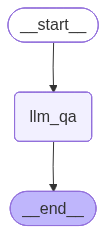

In [29]:
# create Graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node("llm_qa",llm_qa)

# add edges
graph.add_edge(START,"llm_qa")
graph.add_edge("llm_qa",END)

# Compile the state
workflow=graph.compile()
workflow


In [32]:
# execute
initial_state={"question":"what is AI and ML"}
workflow.invoke(initial_state)

{'question': 'what is AI and ML',
 'answer': 'Let\'s break down Artificial Intelligence (AI) and Machine Learning (ML), as they are closely related but distinct concepts.\n\n---\n\n### What is Artificial Intelligence (AI)?\n\n**AI is the broader concept of creating machines that can simulate human intelligence.** It\'s about building systems that can perform tasks that typically require human cognitive abilities.\n\nThink of AI as the **goal** or the **field of study** itself.\n\n**Key Characteristics & Goals of AI:**\n*   **Reasoning and Problem-Solving:** Making decisions and finding solutions.\n*   **Learning:** Acquiring knowledge and skills from data or experience.\n*   **Perception:** Interpreting sensory information (like vision or speech).\n*   **Language Understanding:** Processing and generating human language.\n*   **Knowledge Representation:** Storing and organizing information about the world.\n*   **Planning:** Setting goals and devising strategies to achieve them.\n\n**T

In [33]:
class BlogState(TypedDict):
  title:str
  outline:str
  content:str

In [34]:
def create_outline(state:BlogState) -> BlogState:
  title = state["title"]
  # call llm gen outline
  prompt = f"Create an outline for a blog post on {title}"
  outline  = llm.invoke(prompt).content
  state["outline"] = outline
  return state

In [35]:
def create_blog(state:BlogState) -> BlogState:
  title = state["title"]
  outline = state["outline"]

  prompt = f"Create a blog post on {title} using this outline {outline}"
  content = llm.invoke(prompt).content
  state["content"]=content
  return state

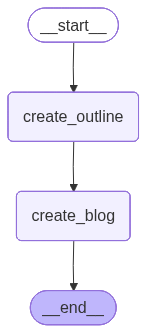

In [37]:
# define Graph
graph = StateGraph(BlogState)

# add nodes
graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)
# add edges
graph.add_edge(START,"create_outline")
graph.add_edge("create_outline","create_blog")
graph.add_edge("create_blog",END)

workflow = graph.compile()
workflow

In [39]:
initial_state={"title":"Rise of AI in Pakistan"}
final_state = workflow.invoke(initial_state)

In [40]:
print(final_state["outline"])

Here's an outline for a blog post on "The Rise of AI in Pakistan," designed to be informative, engaging, and comprehensive.

---

## Blog Post Outline: The Rise of AI in Pakistan: Opportunities, Challenges, and the Road Ahead

**Blog Title Options:**
*   Pakistan's AI Revolution: Shaping the Future, Today
*   The AI Wave: How Pakistan is Embracing Artificial Intelligence
*   From Potential to Powerhouse: The Rise of AI in Pakistan
*   Pakistan's Digital Leap: Navigating the Age of Artificial Intelligence

---

**I. Introduction**
    A. **Hook:** Start with a compelling statement about the global impact of AI and its transformative power.
    B. **Context:** Briefly introduce Pakistan's current digital landscape and its potential for technological growth.
    C. **Thesis Statement:** AI is rapidly gaining traction in Pakistan, presenting immense opportunities for economic growth and societal improvement, while also posing significant challenges that need strategic navigation.
    D. **

In [41]:
print(final_state["content"])

## Pakistan's AI Revolution: Shaping the Future, Today

The world stands on the cusp of a technological renaissance, driven by the relentless march of Artificial Intelligence. From powering smart cities to revolutionizing healthcare, AI's transformative power is reshaping industries, economies, and societies globally. While often viewed through the lens of Silicon Valley or Beijing, this powerful wave is making significant ripples far beyond traditional tech hubs. In Pakistan, a nation brimming with youthful potential and a rapidly expanding digital footprint, AI is not just a buzzword – it's a rapidly gaining force poised to redefine its future.

AI is rapidly gaining traction in Pakistan, presenting immense opportunities for economic growth and societal improvement, while also posing significant challenges that need strategic navigation. This post will delve into the current status of AI adoption in Pakistan, explore the vast opportunities it presents, address the critical challenges